In [96]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import csv
import seaborn as sns
from sklearn.neighbors import KernelDensity
from numpy import exp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [97]:
data= pd.read_excel('/Users/ryan/Downloads/Chronotype_NHANES.xlsx',engine='openpyxl')

In [105]:
data

,Imputation_,Seqn,Sample weight,Strata,Sample Unit,Gender,Age,Race,BMI,Waist_C,...,Trigly,Carb_diet,HSCRP,Smokingstatus,Alcohol,Sleep_hrs,Sleeptime,Wakeuptime,Chronotype_slphrs,WakeUpCat
0,0,83732,NaN,125,1,1,62,2.0,27.8,101.1,...,NaN,126.0,0.6,3.0,1.000000,5.5,23:30:00,05:00:00,3.0,1
1,0,83733,54722.343,125,1,1,53,2.0,30.8,107.9,...,1.660,126.0,1.4,1.0,7.000000,8.0,23:00:00,07:00:00,3.0,3
2,0,83734,25471.094,131,1,1,78,2.0,28.8,116.5,...,3.037,96.0,0.6,3.0,0.000000,7.0,22:30:00,05:30:00,2.0,2
3,0,83735,NaN,131,1,2,56,2.0,42.4,110.1,...,NaN,216.0,9.0,NaN,3.000000,6.5,23:30:00,06:00:00,3.0,2
4,0,83736,38179.511,126,2,2,42,3.0,20.3,80.4,...,0.531,6.0,0.5,NaN,1.000000,NaN,2173-10-13 00:00:00,06:00:00,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37945,5,93449,NaN,119,2,1,56,2.0,NaN,NaN,...,NaN,126.0,NaN,2.0,21.174902,8.0,00:00:00,08:00:00,3.0,3
37946,5,93466,NaN,133,2,2,60,1.0,NaN,NaN,...,NaN,0.0,NaN,1.0,8.008570,NaN,2173-10-13 00:00:00,08:00:00,3.0,3
37947,5,93530,NaN,130,2,2,21,4.0,NaN,NaN,...,NaN,1.5,NaN,NaN,NaN,8.0,22:30:00,06:40:00,2.0,3
37948,5,93641,NaN,129,2,2,80,2.0,NaN,NaN,...,NaN,108.0,NaN,NaN,NaN,8.0,22:00:00,06:00:00,2.0,2


In [4]:
def missing_samples(df, column):
    try:
        for  i in range(0,df[column].max()+1):
            missing_cols=[]
            print("\nImputation type:", i, " Number of samples:",len(df[df[column]==i]),"\n" )
            print("Number of missing samples based on imputation type", i, ': ', df[df[column]==i].isna().sum().sum(), '\n')
            for col in df[df[column]==i].columns:
                print('Number of missing samples in',col,': ', df[df[column]==i][col].isna().sum())
                if df[df[column]==i][col].isna().sum() >0:
                    missing_cols.append(col)
            print('All columns with missing samples: ', missing_cols)
    except:
        print(column, "is not present in DataFrame passed")
missing_samples(data, 'Imputation_')


Imputation type: 0  Number of samples: 6324 

Number of missing samples based on imputation type 0 :  16401 

Number of missing samples in Imputation_ :  0
Number of missing samples in Seqn :  0
Number of missing samples in Sample weight :  3441
Number of missing samples in Strata :  0
Number of missing samples in Sample Unit :  0
Number of missing samples in Gender :  0
Number of missing samples in Age :  0
Number of missing samples in Race :  1
Number of missing samples in BMI :  341
Number of missing samples in Waist_C :  645
Number of missing samples in Systolic :  716
Number of missing samples in Diastolic :  716
Number of missing samples in Trigly :  3835
Number of missing samples in Carb_diet :  0
Number of missing samples in HSCRP :  660
Number of missing samples in Smokingstatus :  3905
Number of missing samples in Alcohol :  2104
Number of missing samples in Sleep_hrs :  31
Number of missing samples in Sleeptime :  0
Number of missing samples in Wakeuptime :  0
Number of mis

In [5]:
def drop_duplicates(df):
    duplicate_rows = df[df.duplicated()]
    duplicate_cols = df.columns[df.columns.duplicated()]
    new_df = df.drop(columns=duplicate_cols, inplace=False)
    print("Duplicated columns: \n", duplicate_cols)
    print("Duplicated rows: \n", duplicate_rows)
    return new_df
drop_duplicates(data)

Duplicated columns: 
 Index([], dtype='object')
Duplicated rows: 
 Empty DataFrame
Columns: [Imputation_, Seqn, Sample weight, Strata, Sample Unit, Gender, Age, Race, BMI, Waist_C, Systolic, Diastolic, Trigly, Carb_diet, HSCRP, Smokingstatus, Alcohol, Sleep_hrs, Sleeptime, Wakeuptime, Chronotype_slphrs, WakeUpCat]
Index: []

[0 rows x 22 columns]


,Imputation_,Seqn,Sample weight,Strata,Sample Unit,Gender,Age,Race,BMI,Waist_C,...,Trigly,Carb_diet,HSCRP,Smokingstatus,Alcohol,Sleep_hrs,Sleeptime,Wakeuptime,Chronotype_slphrs,WakeUpCat
0,0,83732,NaN,125,1,1,62,2.0,27.8,101.1,...,NaN,126.0,0.6,3.0,1.000000,5.5,23:30:00,05:00:00,3.0,1
1,0,83733,54722.343,125,1,1,53,2.0,30.8,107.9,...,1.660,126.0,1.4,1.0,7.000000,8.0,23:00:00,07:00:00,3.0,3
2,0,83734,25471.094,131,1,1,78,2.0,28.8,116.5,...,3.037,96.0,0.6,3.0,0.000000,7.0,22:30:00,05:30:00,2.0,2
3,0,83735,NaN,131,1,2,56,2.0,42.4,110.1,...,NaN,216.0,9.0,NaN,3.000000,6.5,23:30:00,06:00:00,3.0,2
4,0,83736,38179.511,126,2,2,42,3.0,20.3,80.4,...,0.531,6.0,0.5,NaN,1.000000,NaN,2173-10-13 00:00:00,06:00:00,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37945,5,93449,NaN,119,2,1,56,2.0,NaN,NaN,...,NaN,126.0,NaN,2.0,21.174902,8.0,00:00:00,08:00:00,3.0,3
37946,5,93466,NaN,133,2,2,60,1.0,NaN,NaN,...,NaN,0.0,NaN,1.0,8.008570,NaN,2173-10-13 00:00:00,08:00:00,3.0,3
37947,5,93530,NaN,130,2,2,21,4.0,NaN,NaN,...,NaN,1.5,NaN,NaN,NaN,8.0,22:30:00,06:40:00,2.0,3
37948,5,93641,NaN,129,2,2,80,2.0,NaN,NaN,...,NaN,108.0,NaN,NaN,NaN,8.0,22:00:00,06:00:00,2.0,2


In [ ]:
wake_up_cat = {
    1 : 4 <= x <= 5,
    2 : 5 < x <= 6.5,
    3 : 6.5 < x <= 8,
    4: 8 < x <= 9.5,
    5: x<4 | x>9.5
}

sleep_time_cat = {

    1: 9 <= x <= 9.5,
    2: 9.5 < x <= 10.5,
    3: 10.5 < x <= 12.5,
    4: 1 <= x <=2 ,
    5: 2 < x  <= 4 
}


In [55]:
import datetime as dt

In [95]:
data[data['Chronotype_slphrs'] ==4]['Sleeptime'].max()

datetime.time(2, 0)

In [6]:
df = data[(data.Imputation_==0) & (data.HSCRP.notnull())].drop(columns=['Sleeptime', 'Wakeuptime','Imputation_','Strata', 'Sample Unit','Sample weight', 'Seqn','Trigly','Smokingstatus'])
df['HSCRP_cat']= df.apply(lambda x: 'low' if x['HSCRP'] < 3 else 'high',axis=1)
df.rename(columns={"Chronotype_slphrs":"SleepTimeCat"}, inplace=True)

new_df = df[(df.Carb_diet <2000) & (df.Sleep_hrs <=24)]
classification_df = new_df.drop(columns=('HSCRP'))
regression_df = new_df.drop(columns=('HSCRP_cat'))


In [14]:
len(new_df[new_df['HSCRP_cat'] == 'low'])
#len(new_df[new_df['HSCRP_cat'] == 'high'])

3592

In [7]:
#new_df.to_csv('/Users/ryan/Desktop/ResearchRepo/HSCRPmlResearch/preprocessed_data.csv')
#new_df.to_csv('/Users/ryan/Desktop/ResearchRepo/HSCRPmlResearch/preprocessed_data_w_race.csv')

In [14]:
discrete_vars = ['Gender', 'Age', 'Smokingstatus', 'Alcohol', 'SleepTimeCat', 'WakeUpCat']
continuous_vars=['Sleep_hrs', 'Waist_C', 'Systolic', 'Diastolic', 'Trigly', 'Carb_diet', 'BMI']
label=['HSCRP_cat']


In [15]:
label


['HSCRP_cat']

<Figure size 1440x792 with 0 Axes>

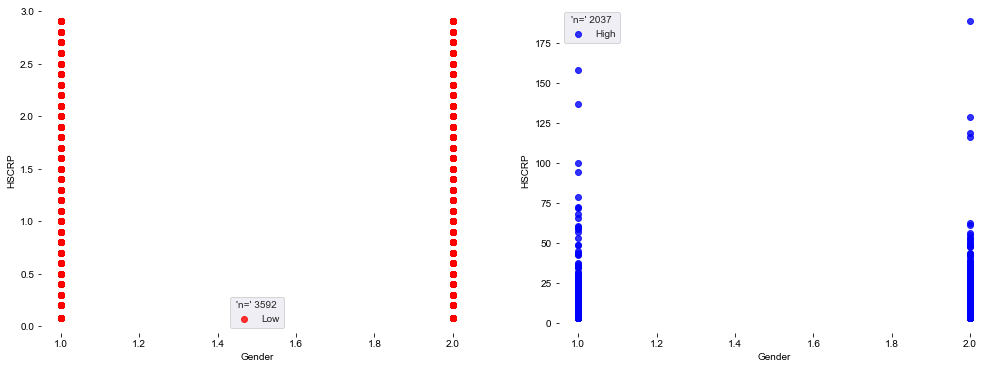

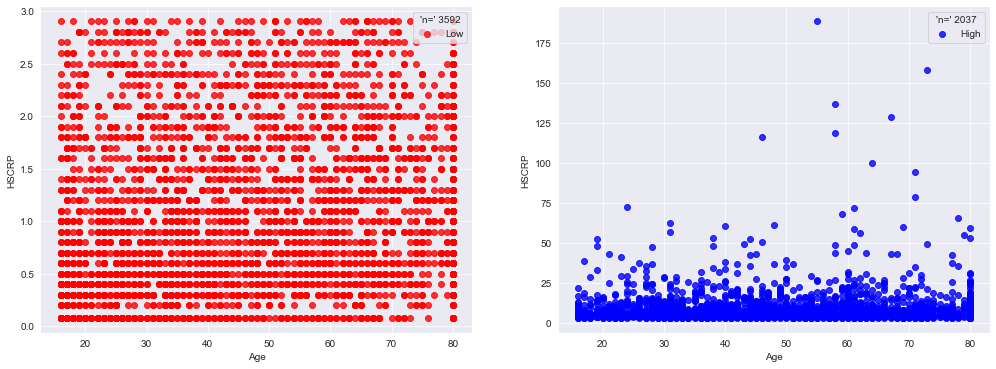

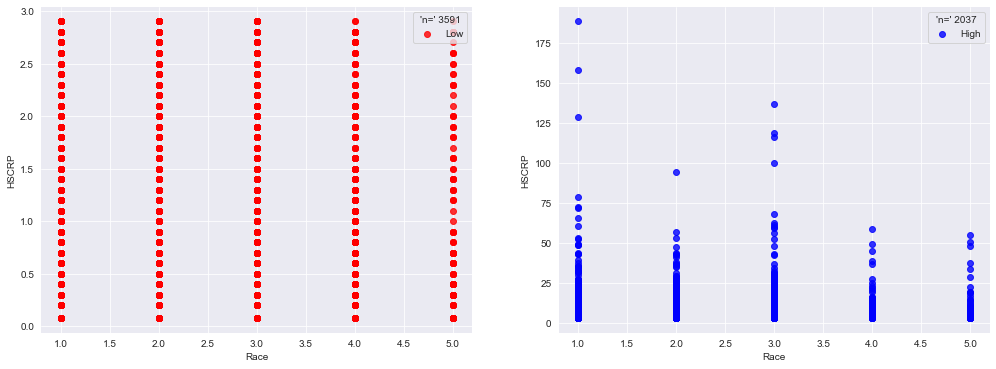

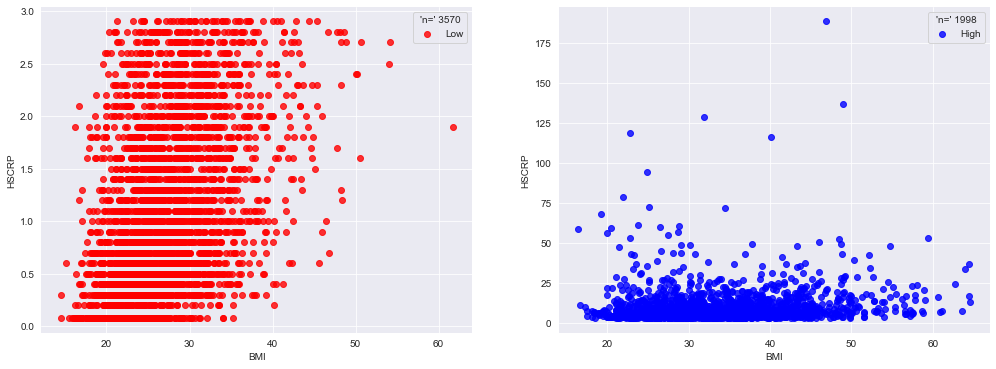

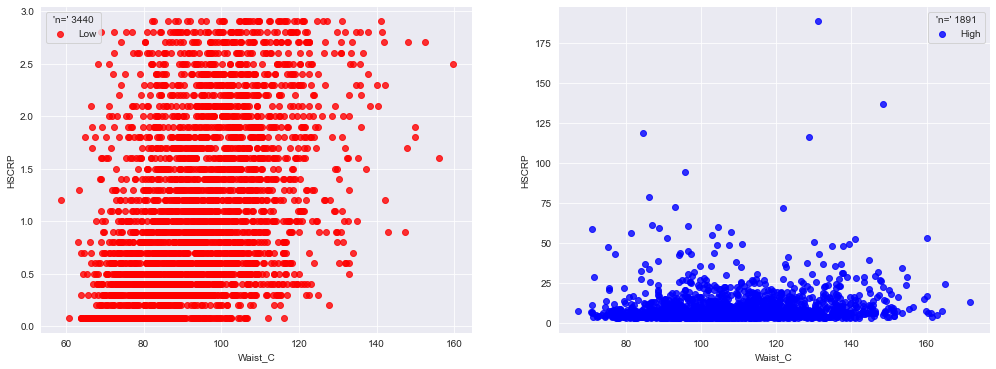

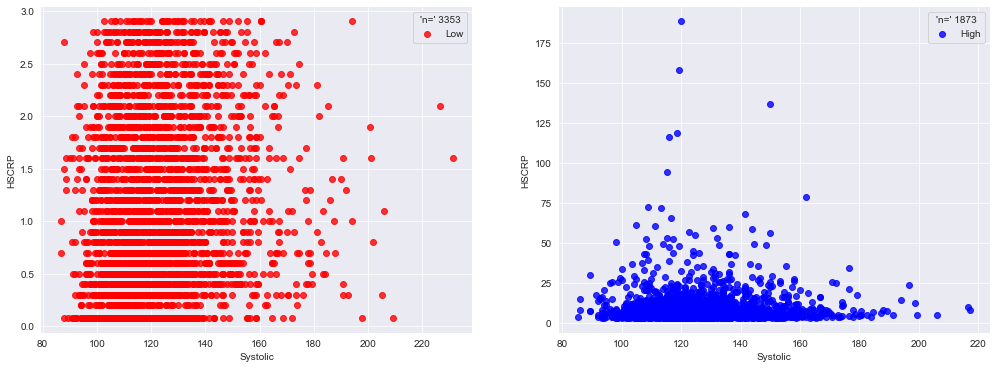

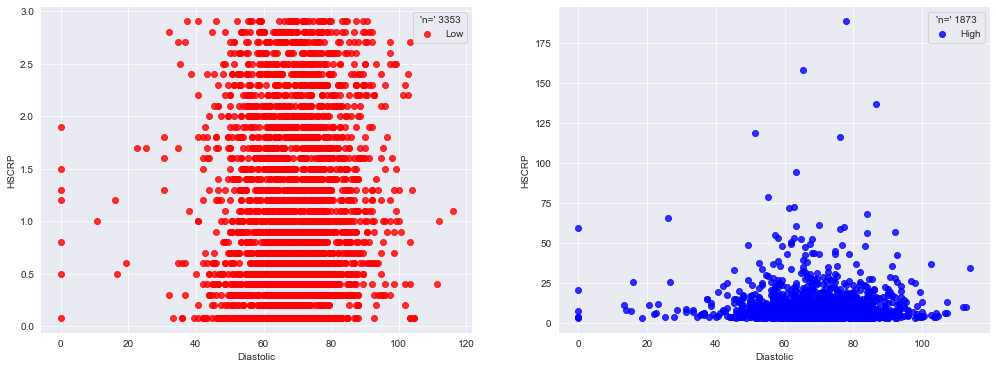

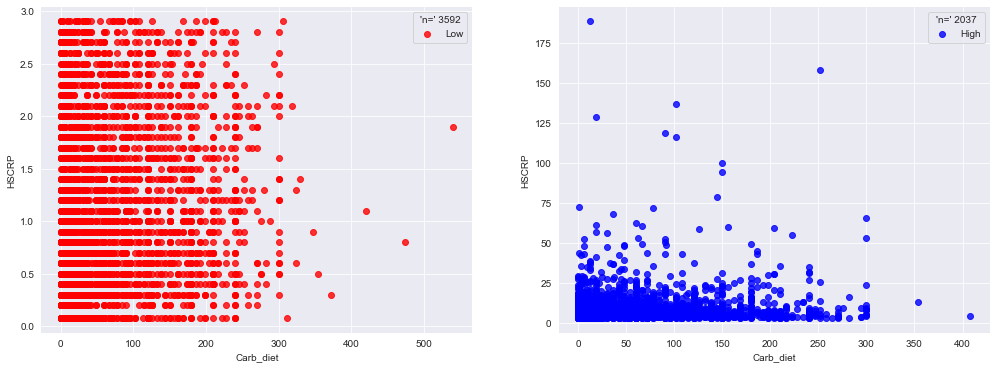

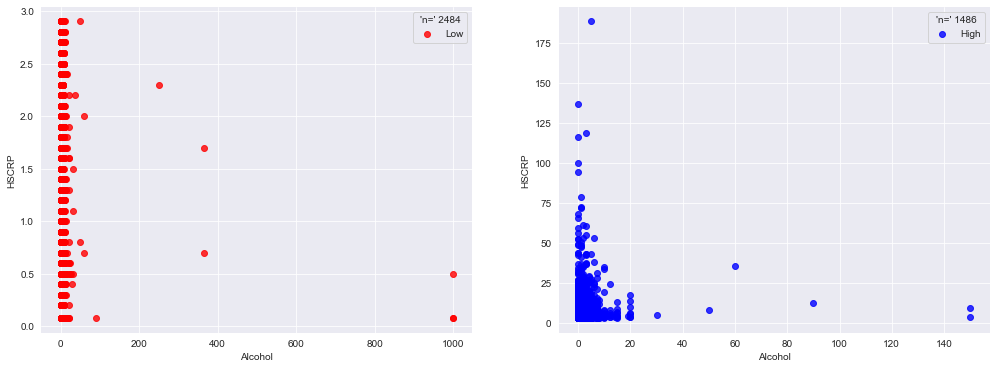

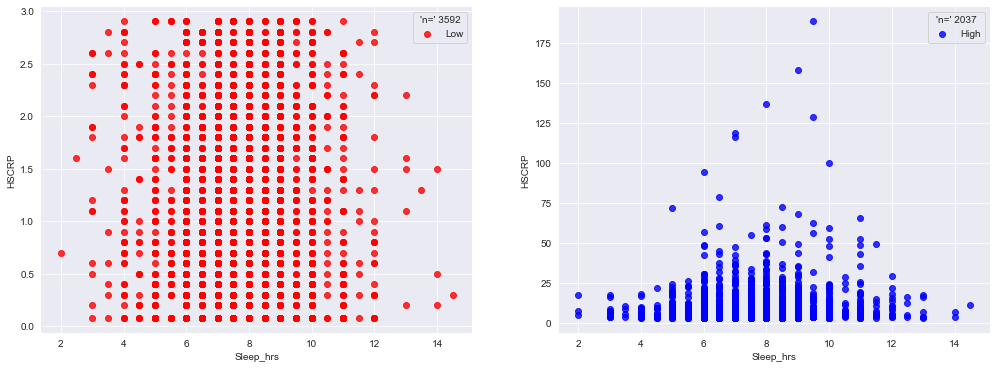

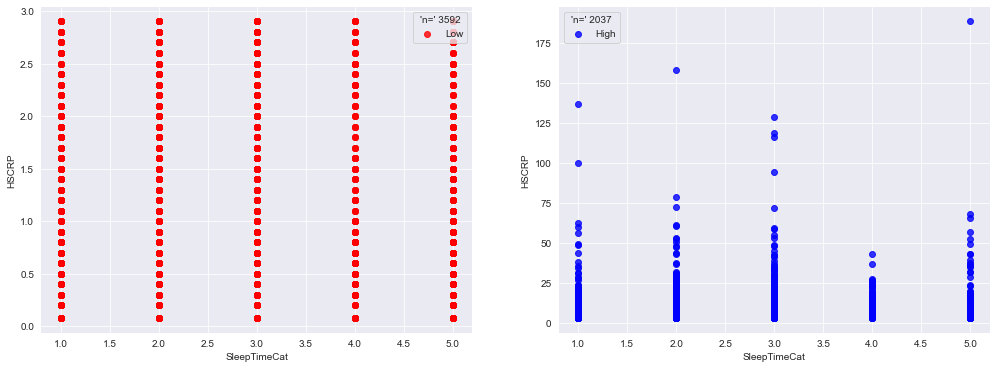

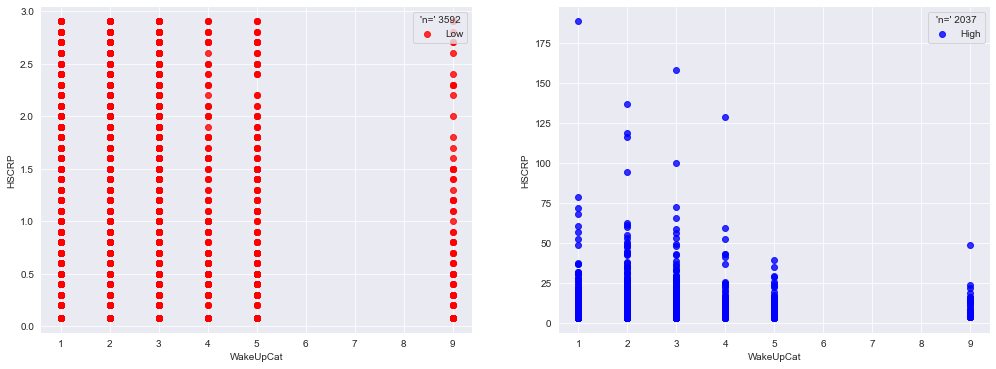

In [8]:
def plot_feature_distributions_reg(df, target):
    plt.figure(figsize=(20, 11))
    for col in df.columns:
        if target not in col:
            fig, ax = plt.subplots(1,2, figsize=(17,6))
            ax=ax.flatten()
            sns.set_style("darkgrid")
            sns.despine(left=True, bottom=True)
            sns.regplot(x=col, y=target, data=df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'low') ], color='red', scatter=True, fit_reg=False, ax=ax[0])
            sns.regplot(x=col, y=target, data=df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'high') ], color='blue',scatter=True, fit_reg= False, ax=ax[1])
            ax[0].legend(title= str(["n=",len(df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'low') ])]).replace('[','').replace(']','').replace(',',''), labels=['Low'])
            ax[1].legend(title= str(["n=",len(df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'high') ])]).replace('[','').replace(']','').replace(',',''), labels=['High'])
            
            plt.show()
plot_feature_distributions_reg(new_df, 'HSCRP')

<Figure size 1080x576 with 0 Axes>

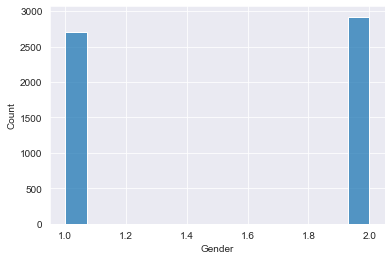

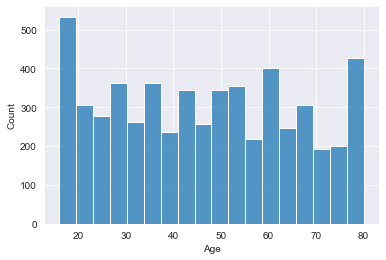

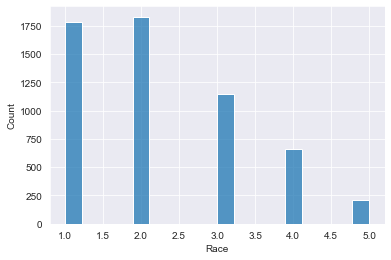

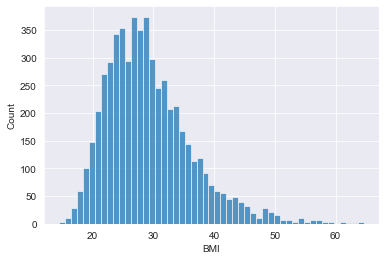

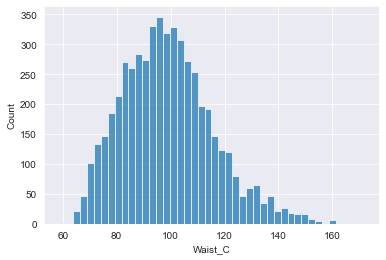

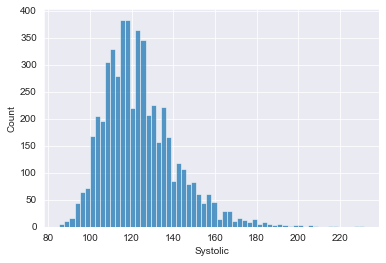

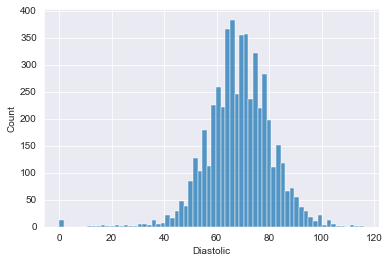

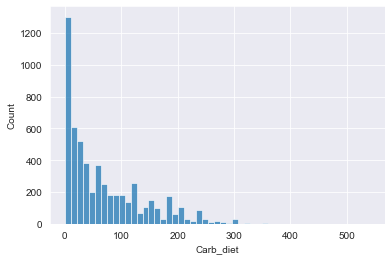

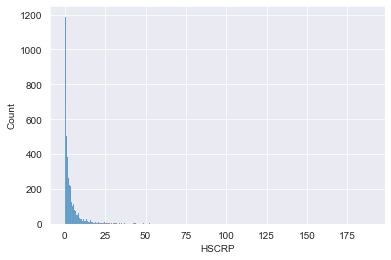

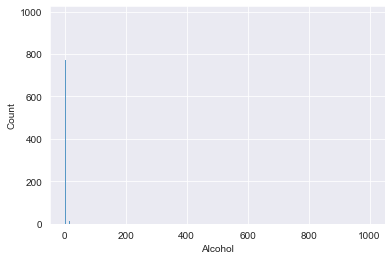

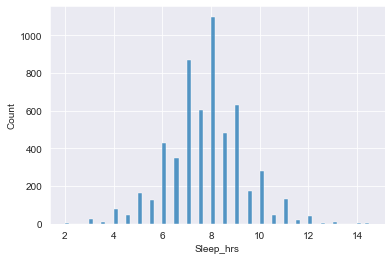

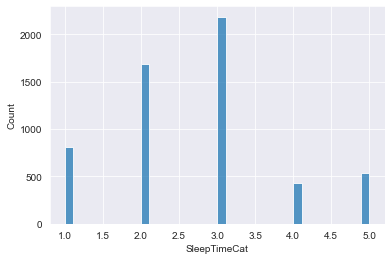

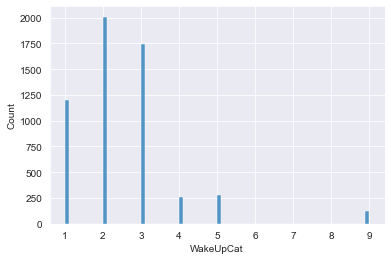

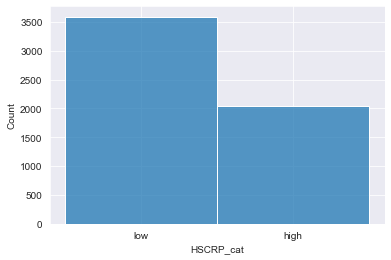

In [9]:
def plot_feature_distributions_hist(df):
    plt.figure(figsize=(15, 8))
    for col in df.columns:
        plt.figure()
        sns.histplot(data =df[df[col].notnull()], x=col)
            
plot_feature_distributions_hist(new_df)

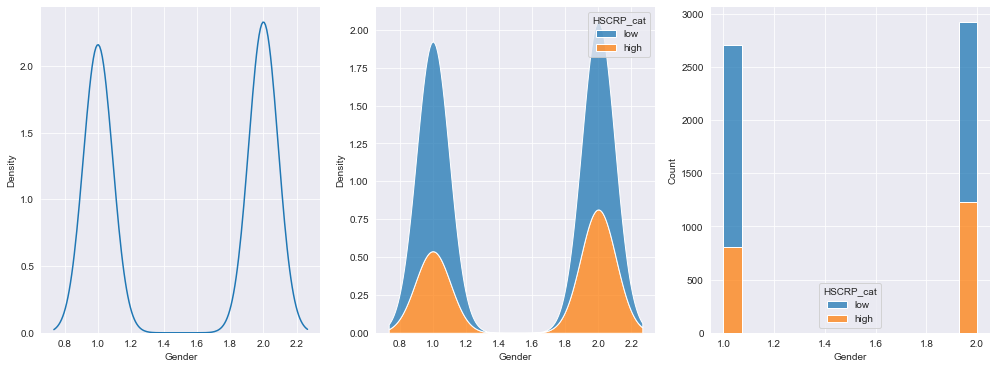

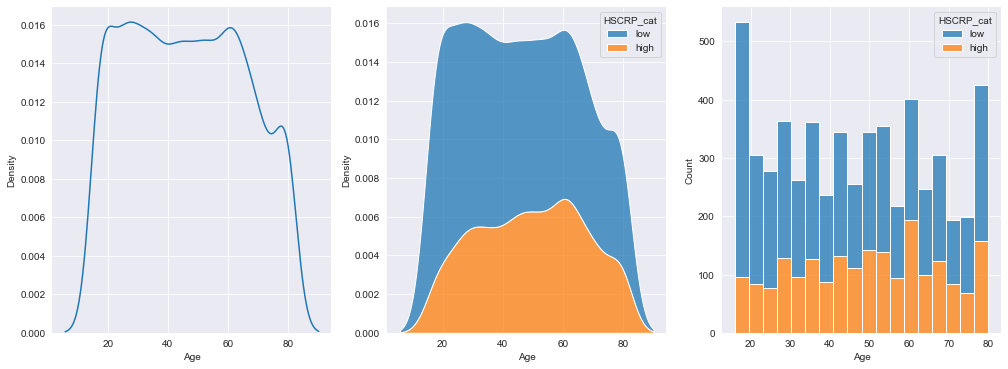

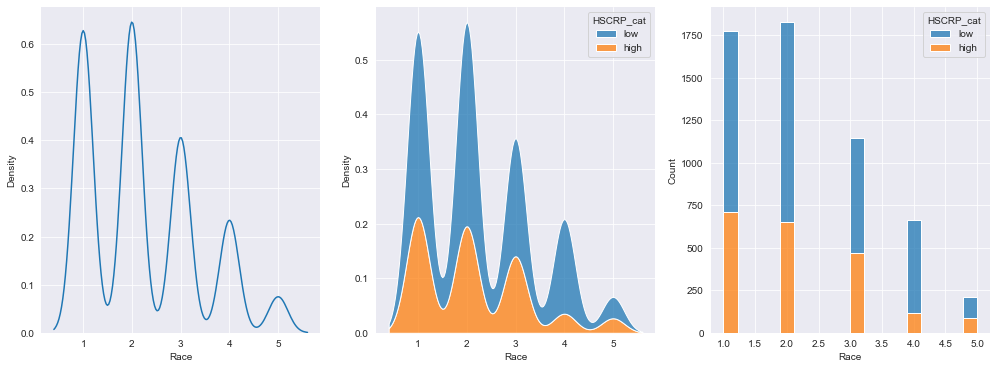

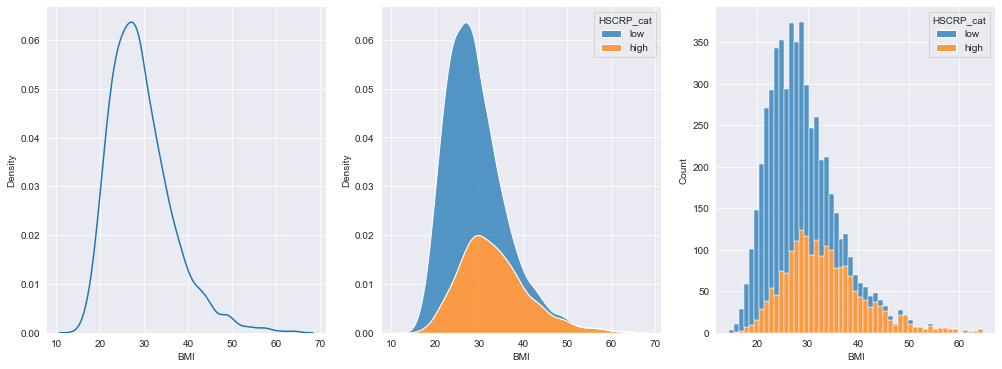

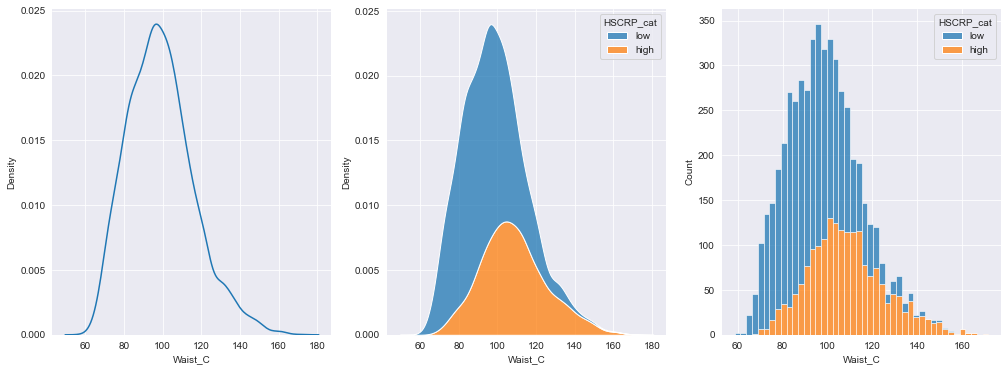

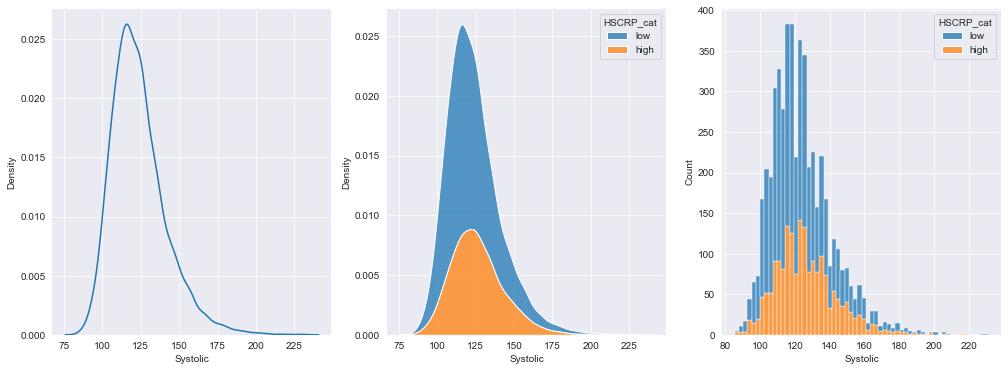

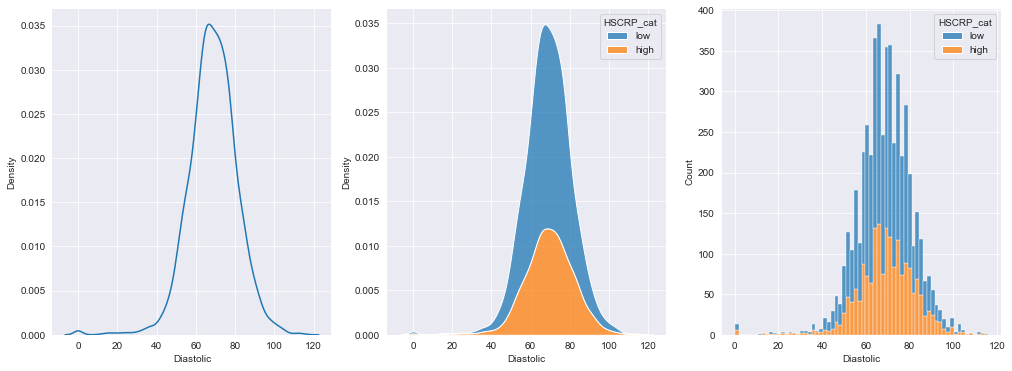

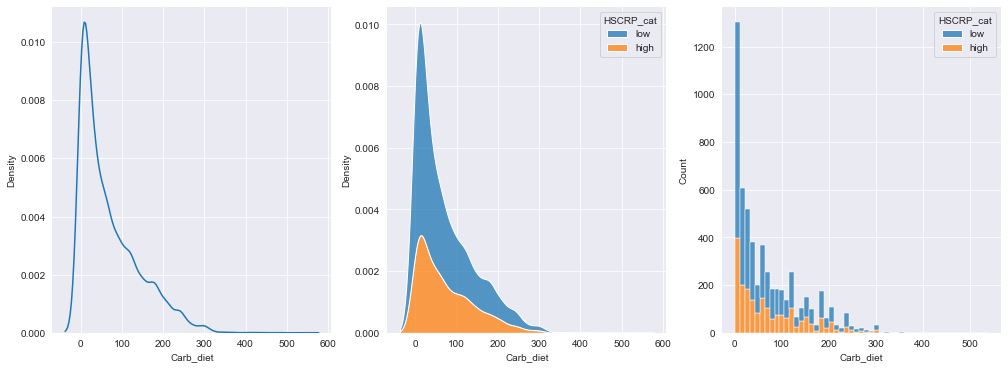

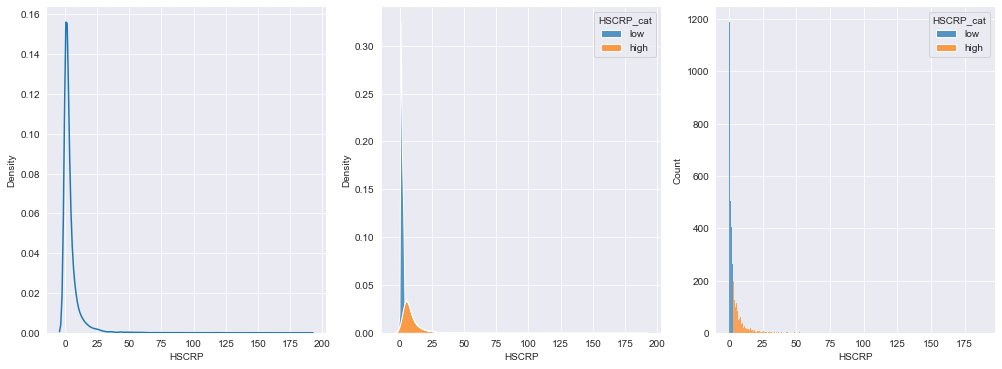

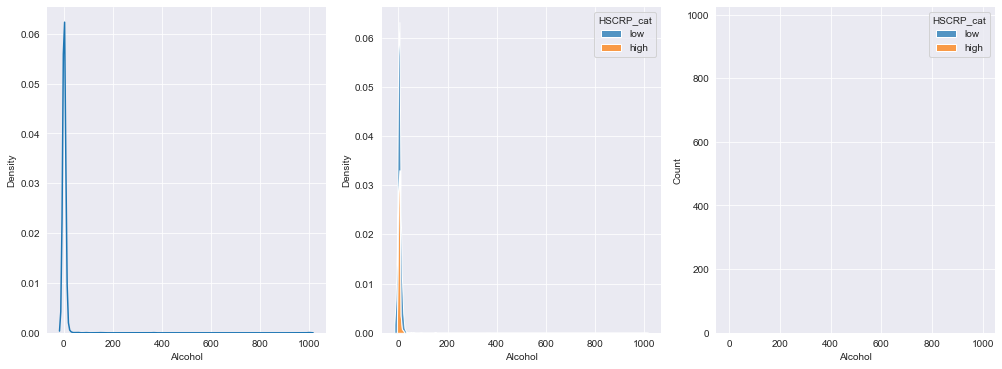

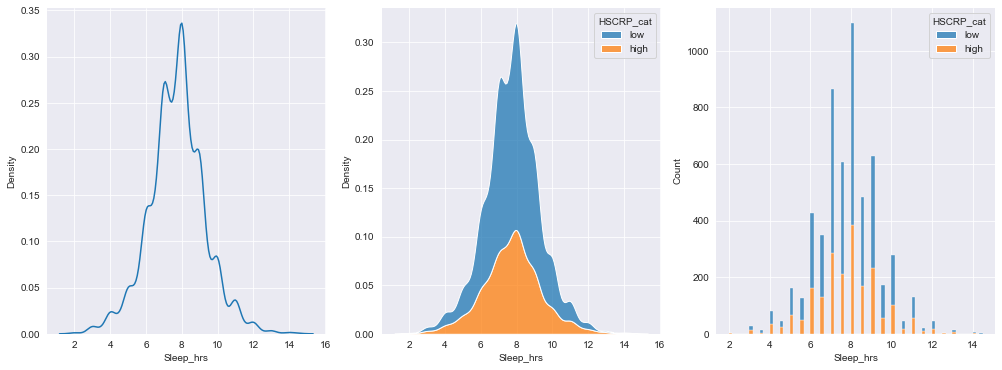

In [10]:
def estimate_distribution(df, col, target):
    fig, ax = plt.subplots(1,3, figsize=(17,6))
    sns.set_style("darkgrid")
    sns.despine(left=True, bottom=True)
    sns.kdeplot(data= df[df[col].notnull()], x=col, ax=ax[0])
    sns.kdeplot(data= df[df[col].notnull()], x=col, hue=target, multiple='stack', ax=ax[1])
    sns.histplot(data= df[df[col].notnull()], x=col, hue=target, multiple='stack', ax=ax[2])
    plt.show()

for col in new_df.columns:
    if ("Cat" in col) or ("cat" in col):
        continue
    estimate_distribution(new_df, col, "HSCRP_cat")

In [11]:
print(len(new_df[new_df.columns[~new_df.columns.isin(['HSCRP', 'HSCRP_cat'])]]))
new_df[new_df.columns[~new_df.columns.isin(['HSCRP', 'HSCRP_cat'])]].isna().sum()

5629


Gender             0
Age                0
Race               1
BMI               61
Waist_C          298
Systolic         403
Diastolic        403
Carb_diet          0
Alcohol         1659
Sleep_hrs          0
SleepTimeCat       0
WakeUpCat          0
dtype: int64

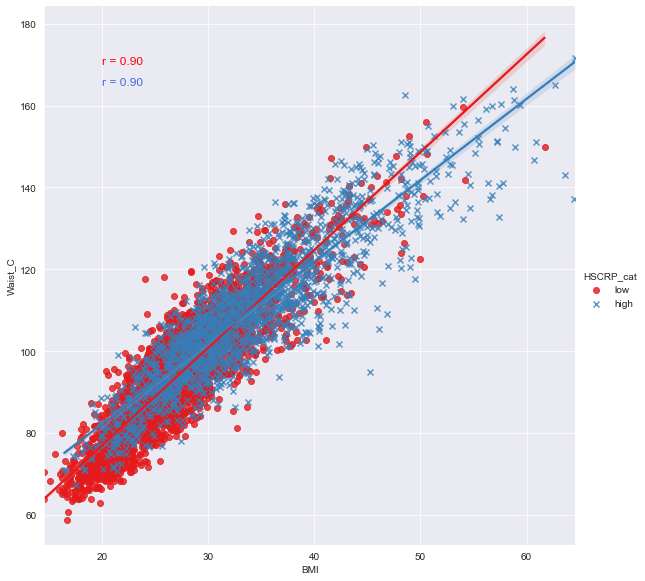

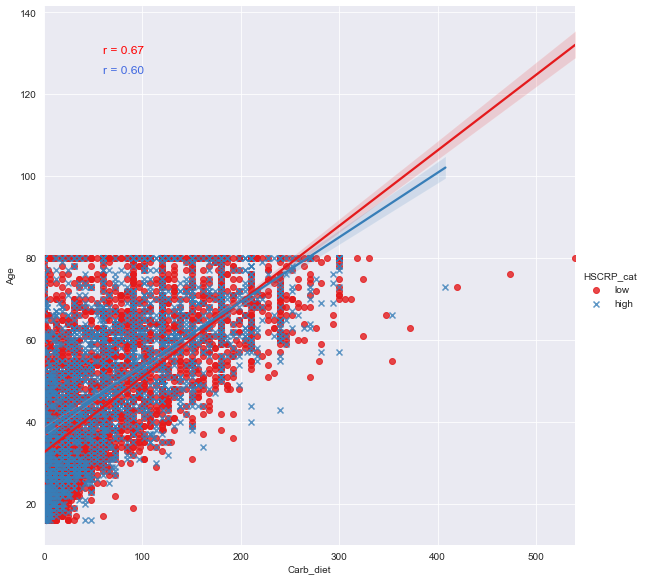

In [12]:
sns.lmplot(x="BMI", y="Waist_C", hue="HSCRP_cat", data=new_df,
           markers=["o", "x"], palette="Set1", height=8, aspect=1)
plt.text(20, 170,
 "r = {:.2f}".format(new_df[new_df['HSCRP_cat']=='low']['BMI'].corr(new_df[new_df['HSCRP_cat']=='low']['Waist_C'])), 
 size="large", color="red")

plt.text(20, 165, "r = {:.2f}".format(new_df[new_df['HSCRP_cat']=='high']['BMI'].corr(new_df[new_df['HSCRP_cat']=='high']['Waist_C'])), size="large", color="royalblue")
plt.show()

sns.lmplot(x="Carb_diet", y="Age", hue="HSCRP_cat", data=new_df,
           markers=["o", "x"], palette="Set1", height=8, aspect=1)
plt.text(60, 130,
 "r = {:.2f}".format(new_df[new_df['HSCRP_cat']=='low']['Carb_diet'].corr(new_df[new_df['HSCRP_cat']=='low']['Age'])), 
 size="large", color="red")

plt.text(60, 125, "r = {:.2f}".format(new_df[new_df['HSCRP_cat']=='high']['Carb_diet'].corr(new_df[new_df['HSCRP_cat']=='high']['Age'])), size="large", color="royalblue")
plt.show()

<AxesSubplot:>

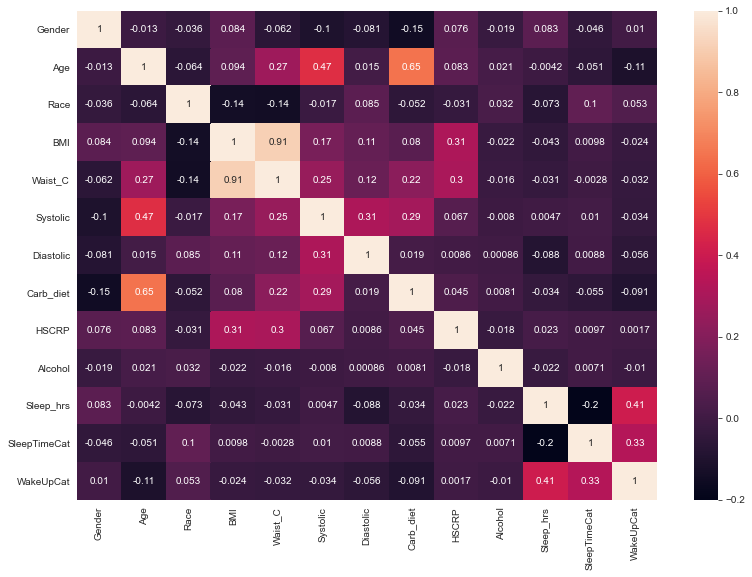

In [13]:
plt.figure(figsize=(13,9))
sns.heatmap(new_df[new_df.columns[~new_df.columns.isin(['HSCRP_cat'])]].corr(), annot=True)

In [28]:
impute_cols=['BMI', 'Systolic', 'Diastolic','Alcohol']

In [29]:
to_test = new_df.copy()
new_df.drop(columns=['Trigly','Smokingstatus'], inplace=True)


KeyError: "['Trigly' 'Smokingstatus'] not found in axis"

In [18]:
def impute_data(data):
    mean_imputed = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(data), 
                                                        columns=data.columns, index=data.index)

    median_imputed =pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(data), 
                                                        columns=data.columns, index=data.index)

    bay_iterative_imputed = pd.DataFrame(IterativeImputer(estimator = BayesianRidge(),random_state=42,
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)

    dec_iterative_imputed = pd.DataFrame(IterativeImputer(estimator=DecisionTreeRegressor(),
                                                        random_state=42, max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)
    
    knn_imputed = pd.DataFrame(KNNImputer(n_neighbors=int(len(data.columns)**0.5), 
                                                        weights='uniform', metric='nan_euclidean').fit_transform(data),
                                                        columns=data.columns, index=data.index)

    return mean_imputed, median_imputed, bay_iterative_imputed, dec_iterative_imputed, knn_imputed

/Users/ryan/opt/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


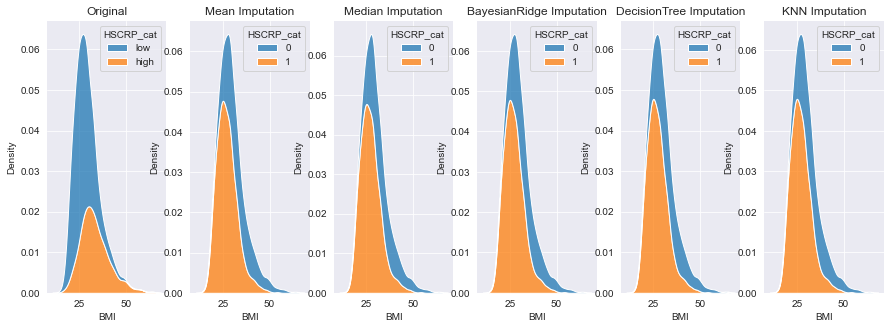

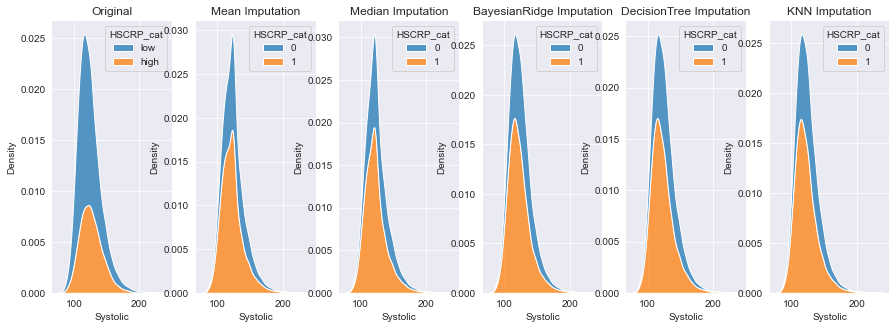

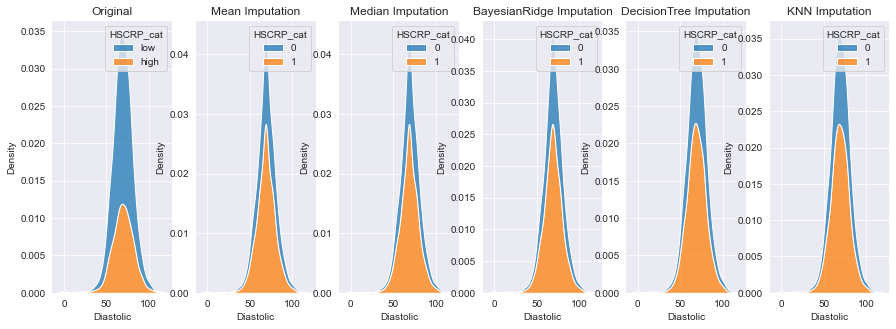

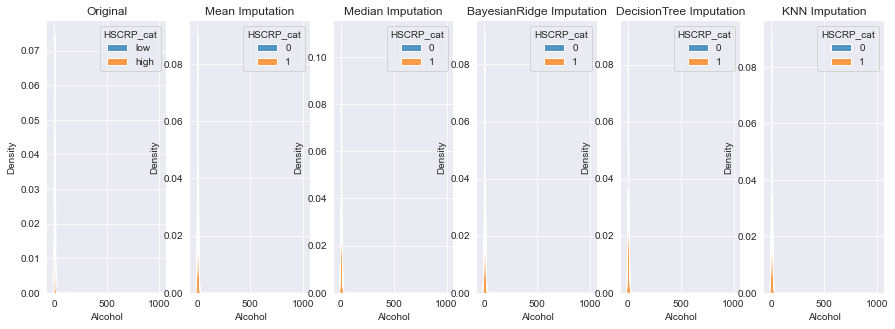

In [30]:
def compare_imputation_distribution(df, cols):
    X_train, X_test, y_train, y_test  = train_test_split(df[df.columns[~df.columns.isin(['HSCRP', 'HSCRP_cat'])]], df.HSCRP_cat,test_size=0.3, random_state=42) 

    X_train['HSCRP_cat'] = y_train

    feature_cols = df.columns[~df.columns.isin(['HSCRP', 'HSCRP_cat'])]
    label_col = LabelEncoder().fit_transform(y_train.values.reshape(-1,1).ravel())


    #impute each df with mean
    mean_imputed_test = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_train[feature_cols]))
    mean_imputed_test.columns=feature_cols
    mean_imputed_test['HSCRP_cat'] = label_col

    #impute each df with median
    median_imputed_test = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(X_train[feature_cols]))
    median_imputed_test.columns=feature_cols
    median_imputed_test['HSCRP_cat'] = label_col


    #impute each df with iterative Bayesian Ridge
    bay_iterative_imputer = IterativeImputer(estimator = BayesianRidge(),random_state=42, max_iter=50)
    bay_iterative_imputed_test = pd.DataFrame(bay_iterative_imputer.fit_transform(X_train[feature_cols]))
    bay_iterative_imputed_test.columns=feature_cols
    bay_iterative_imputed_test['HSCRP_cat'] = label_col

    #impute each df with iterative Decision Tree
    dec_iterative_imputer = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=42, max_iter=50)
    dec_iterative_imputed_test = pd.DataFrame(dec_iterative_imputer.fit_transform(X_train[feature_cols]))
    dec_iterative_imputed_test.columns=feature_cols
    dec_iterative_imputed_test['HSCRP_cat'] = label_col

    #impute each df with KNN
    knn_imputed_test = pd.DataFrame(KNNImputer(n_neighbors=int(len(feature_cols)**0.5), 
                                                        weights='uniform', metric='nan_euclidean').fit_transform(X_train[feature_cols]))
    knn_imputed_test.columns=feature_cols
    knn_imputed_test['HSCRP_cat'] = label_col

   
    #score of dummy classifier with original data
    #orig_Dummy = DummyClassifier(strategy="uniform").fit(X= df[df['HSCRP_cat'].notna()].drop(['HSCRP_cat','HSCRP'],axis=1,inplace=False).dropna(), 
    #                                                                    y= df[df.notna()].dropna()['HSCRP_cat'].values)
    #orig_score= orig_Dummy.score(X=df[df['HSCRP_cat'].notna()].drop(['HSCRP_cat','HSCRP'],axis=1,inplace=False).dropna(), y=df[df.notna()].dropna()['HSCRP_cat'].values)

    for col in cols:
        fig, ax = plt.subplots(1,6, figsize=(15,5))
        sns.set_style("darkgrid")
        sns.despine(left=True, bottom=True)
        sns.kdeplot(data= X_train[X_train[col].notnull()], x=col, hue='HSCRP_cat', multiple='stack',ax=ax[0])
        sns.kdeplot(data= mean_imputed_test, x=col, hue='HSCRP_cat', multiple='stack', ax=ax[1])
        sns.kdeplot(data= median_imputed_test, x=col, hue='HSCRP_cat', multiple='stack', ax=ax[2])
        sns.kdeplot(data= bay_iterative_imputed_test, x=col, hue='HSCRP_cat', multiple='stack', ax=ax[3])
        sns.kdeplot(data= dec_iterative_imputed_test, x=col, hue='HSCRP_cat', multiple='stack', ax=ax[4])
        sns.kdeplot(data= knn_imputed_test, x=col, hue='HSCRP_cat', multiple='stack', ax=ax[5])

        ax[0].title.set_text('Original')
        ax[1].title.set_text('Mean Imputation')
        ax[2].title.set_text('Median Imputation')
        ax[3].title.set_text('BayesianRidge Imputation')
        ax[4].title.set_text('DecisionTree Imputation')
        ax[5].title.set_text('KNN Imputation')

        plt.show()
        
    return mean_imputed_test, median_imputed_test, bay_iterative_imputed_test,dec_iterative_imputed_test, knn_imputed_test, X_test, y_test
mean_imputed, median_imputed, bay_iterative_imputed, dec_iterative_imputed, knn_imputed, X_test, y_test = compare_imputation_distribution(new_df.reset_index(drop=True), impute_cols)


In [34]:
new_df.drop(columns=['Waist_C', 'Race','Carb_diet'],inplace=True)

/Users/ryan/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
new_df

,Gender,Age,BMI,Systolic,Diastolic,HSCRP,Alcohol,Sleep_hrs,SleepTimeCat,WakeUpCat,HSCRP_cat
0,1,62,27.8,122.6667,65.33334,0.6,1.0,5.5,3.0,1,low
1,1,53,30.8,140.0000,86.00000,1.4,7.0,8.0,3.0,3,low
2,1,78,28.8,135.3333,45.33333,0.6,0.0,7.0,2.0,2,low
3,2,56,42.4,134.0000,70.00000,9.0,3.0,6.5,3.0,2,high
5,2,72,28.6,119.3333,58.66667,2.5,NaN,9.0,1.0,2,low
...,...,...,...,...,...,...,...,...,...,...,...
6055,1,25,21.0,112.0000,76.00000,2.8,NaN,8.0,1.0,2,low
6056,2,76,21.5,111.3333,47.33333,2.0,NaN,9.5,2.0,3,low
6058,2,80,31.0,148.0000,55.33333,2.5,2.0,10.0,2.0,3,low
6059,1,35,26.0,104.6667,65.33334,16.4,NaN,6.0,4.0,3,high


In [36]:
#imputed_dict = {"mean_imputed": mean_imputed, "median_imputed": median_imputed,
#                 "bay_iterative_imputed": bay_iterative_imputed,"dec_iterative_imputed":dec_iterative_imputed,"knn_imputed": knn_imputed}

In [38]:
imputed_dict = {"bay_iterative_imputed": bay_iterative_imputed,"dec_iterative_imputed":dec_iterative_imputed,"knn_imputed": knn_imputed}

In [40]:
def compare_imputation_errors(df, impute_cols):

    X_train, X_test, y_train, y_test  = train_test_split(df[df.columns[~df.columns.isin(['HSCRP', 'HSCRP_cat'])]], 
                                                df.HSCRP_cat,test_size=0.3, random_state=42) 

    #take in data with missing values, drop missing values and make copy
    no_null_df  = X_train.dropna()
    to_null_df = no_null_df.copy()
    
    #randomly drop some true values (30%) but use index to access data
    impute_col_index_dict = {}
    for col in impute_cols:
        impute_col_index= to_null_df[col].dropna(inplace=False).sample(frac=0.30).index
        impute_col_index_dict[col] = impute_col_index
        to_null_df.loc[impute_col_index, col] = np.nan

    mean_imputed, median_imputed, bay_iterative_imputed, dec_iterative_imputed, knn_imputed =impute_data(to_null_df)

    imputed_dict = {"bay_iterative_imputed": bay_iterative_imputed,"dec_iterative_imputed":dec_iterative_imputed,"knn_imputed": knn_imputed}

    to_dataframe =[]
    for col in impute_cols:
        for impute_type,imputed_df in imputed_dict.items():
            to_dataframe.append(
                {
                'Feature' : col,
                'Imputed type' : impute_type,
                'MAE' : mean_absolute_error(no_null_df.loc[impute_col_index_dict.get(col), col],
                            imputed_df.loc[impute_col_index_dict.get(col),col])
                }
            )
    return pd.DataFrame(to_dataframe)

compare_imputation_errors(new_df.reset_index(drop=True), impute_cols)

/Users/ryan/opt/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,Feature,Imputed type,MAE
0,BMI,bay_iterative_imputed,5.389598
1,BMI,dec_iterative_imputed,7.265504
2,BMI,knn_imputed,5.860465
3,Systolic,bay_iterative_imputed,11.098581
4,Systolic,dec_iterative_imputed,15.592593
5,Systolic,knn_imputed,13.322136
6,Diastolic,bay_iterative_imputed,8.745223
7,Diastolic,dec_iterative_imputed,11.876399
8,Diastolic,knn_imputed,9.688774
9,Alcohol,bay_iterative_imputed,3.929215


In [ ]:
to_test1 = to_test.dropna(inplace=False).reset_index(inplace=False)

In [ ]:
to_test1.drop(columns=['HSCRP_cat','HSCRP'])

,index,Gender,Age,BMI,Waist_C,Systolic,Diastolic,Carb_diet,Alcohol,Sleep_hrs,SleepTimeCat,WakeUpCat
0,0,1,62,27.8,101.1,122.6667,65.33334,126.0,1.0,5.5,3.0,1
1,1,1,53,30.8,107.9,140.0000,86.00000,126.0,7.0,8.0,3.0,3
2,2,1,78,28.8,116.5,135.3333,45.33333,96.0,0.0,7.0,2.0,2
3,3,2,56,42.4,110.1,134.0000,70.00000,216.0,3.0,6.5,3.0,2
4,6,1,22,28.0,86.6,111.3333,72.66666,5.5,3.0,6.5,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3634,6047,2,72,23.4,90.4,136.0000,68.66666,168.0,0.0,9.0,2.0,3
3635,6051,1,53,32.0,107.5,127.3333,55.33333,43.5,3.0,6.0,2.0,1
3636,6053,2,69,28.1,101.1,164.0000,66.00000,162.0,0.0,8.0,2.0,2
3637,6054,1,32,32.9,101.0,115.3333,62.00000,2.0,5.0,7.0,3.0,2


In [ ]:
pd.Series(LabelEncoder().fit_transform(to_test1['HSCRP_cat'].values.reshape(-1,1).ravel()))

0       1
1       1
2       1
3       0
4       1
       ..
3634    0
3635    0
3636    1
3637    1
3638    0
Length: 3639, dtype: int64

In [ ]:
def compare_imputation_prediction(X,y):
    LogReg = LogisticRegression(max_iter=10000, penalty='none')
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    for train_index,test_index in skf.split(X,y):
        X_train_strat,X_test_strat = X.loc[train_index],X.loc[test_index]
        y_train_strat,y_test_strat = y.loc[train_index],y.loc[test_index]
        LogReg.fit(X_train_strat, y_train_strat)
    accuracy = accuracy_score(y_test_strat,LogReg.predict(X_test_strat))
    roc_auc = roc_auc_score(y_test_strat,LogReg.predict(X_test_strat))
    return accuracy, roc_auc

    
orig_X = new_df[new_df['HSCRP_cat'].notna()].drop(['HSCRP_cat','HSCRP'],axis=1,inplace=False).dropna().reset_index(drop=True)
orig_y = pd.Series(LabelEncoder().fit_transform(new_df[new_df.notna()].dropna()['HSCRP_cat'].values.reshape(-1,1).ravel()))

orig_accuracy, orig_roc_auc = compare_imputation_prediction(orig_X, orig_y)
print('Accuracy for non-imputed data\n',orig_accuracy)
print('ROC area under curve for non-imputed data\n', orig_roc_auc,'\n')

no_missing_accuracy, no_missing_roc_auc =compare_imputation_prediction(to_test1.drop(columns=['HSCRP_cat','HSCRP']), 
                                                                        pd.Series(LabelEncoder().fit_transform(to_test1['HSCRP_cat'].values.reshape(-1,1).ravel())))
print('Accuracy for all dropped data with trigy and smoking features\n',no_missing_accuracy)
print('ROC area under curve for all dropped data with trigy and smoking features\n', no_missing_roc_auc,'\n')

for imputation_type, imputed_dataframe in imputed_dict.items():
    accuracy, roc_auc =compare_imputation_prediction(imputed_dataframe.drop(columns=['HSCRP_cat']), imputed_dataframe['HSCRP_cat'] )
    print('Accuracy for {}\n'.format(imputation_type),accuracy)
    print('ROC area under curve for {}\n'.format(imputation_type), roc_auc,'\n')





Accuracy for non-imputed data
 0.7235213204951857
ROC area under curve for non-imputed data
 0.6673457032528307 



NameError: name 'to_test1' is not defined